In [8]:
%matplotlib inline
from sklearn import svm
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import random

In [16]:
pathname = 'hw01_data/'
spam = scipy.io.loadmat(pathname + 'spam/spam_data_BOW_validation.mat')

In [17]:
train = spam['training_data']
train.shape

(4138, 50501)

In [22]:
all_training_accuracy = []
all_validation_accuracy = []
all_training_size = [100, 200, 500, 1000, 2000, 4000]

for size in all_training_size:
	idx = random.sample(range(0, spam['training_data'].shape[0]), size)
	training_data = spam['training_data'][idx]
	training_labels = spam['training_labels'].ravel()[idx]
	validation_data = spam['validation_data']
	validation_labels = spam['validation_labels'].ravel()
	clf = svm.LinearSVC(C=50)
	clf.fit(training_data, training_labels)
	training_accuracy = clf.score(training_data, training_labels)
	validation_accuracy = clf.score(validation_data, validation_labels)
	all_training_accuracy.append(training_accuracy)
	all_validation_accuracy.append(validation_accuracy)
print(all_training_accuracy)
print(all_validation_accuracy)

[1.0, 1.0, 0.998, 0.998, 0.998, 0.999]
[0.91102514506769827, 0.94003868471953578, 0.94680851063829785, 0.97292069632495159, 0.98259187620889743, 0.9874274661508704]


4000 :  0.987427466151


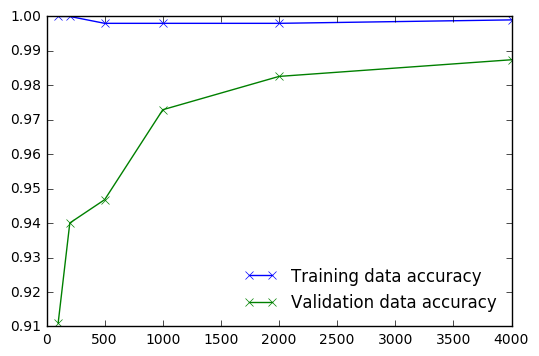

In [23]:


max_idx = all_validation_accuracy.index(max(all_validation_accuracy))
print(all_training_size[max_idx], ': ', max(all_validation_accuracy))

plt.plot(all_training_size, all_training_accuracy, label='Training data accuracy', marker='x')
plt.plot(all_training_size, all_validation_accuracy, label='Validation data accuracy', marker='x')
plt.legend(loc='lower right', frameon=False)
plt.show()